In [1]:
import pandas as pd

In [2]:
DATABASE_FIELDS = ['year', 'tif_number', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text']
DATABASE_DTYPES = {
	'year': int,
	'tif_number': int,
	'page_num': int,
	'block_num': int,
	'par_num': int,
	'line_num': int,
	'word_num': int,
	'left': int,
	'top': int,
	'width': int,
	'height': int,
	'conf': float,
	'text': str
}
csv_file_path = 'C:/Users/noahb/NProgramming/TIFDataTeam/DataScraping/TIF_Portable/finished/2012_10.csv'

In [3]:
# Load in the csv
csv = pd.read_csv(csv_file_path, header=None, names=DATABASE_FIELDS)

In [4]:
csv

,year,tif_number,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,2012,10,0,1,1,1,1,879,567,180,66,96.37,2012
1,2012,10,0,1,1,1,2,1080,567,288,66,96.20,Annual
2,2012,10,0,1,1,1,3,1395,568,273,82,96.52,Report
3,2012,10,0,2,1,1,1,905,764,185,84,80.77,"126"""
4,2012,10,0,2,1,1,2,1115,783,145,66,96.65,and
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7032,2012,10,36,14,1,2,5,1410,3141,81,23,96.07,WITH
7033,2012,10,36,14,1,2,6,1521,3136,123,28,93.22,MOORE
7034,2012,10,36,14,1,2,7,1671,3136,183,28,96.49,STEPHENS
7035,2012,10,36,15,1,1,1,1217,3211,141,51,21.39,ES


In [5]:
# Get stuff from page 30
page_31_text = csv[csv['page_num']==30]

In [15]:
import fitz
import io
from PIL import Image, ImageDraw

In [9]:
# Load in the pdf
pdf_file_path = 'C:/Users/noahb/NProgramming/TIFDataTeam/DataScraping/TIF_Portable/TIFpdfs/2012/10.pdf'
pdf = fitz.open(pdf_file_path)

In [47]:
page_31 = pdf.load_page(30)
pixmap = page_31.get_pixmap(dpi=300)
image = Image.frombytes('RGB', [pixmap.width, pixmap.height], pixmap.samples)
image_bytes = io.BytesIO()
image.save(image_bytes, jpg_quality=100, format="PNG")
image_bytes.seek(0)

page_31_image = Image.open(image_bytes)

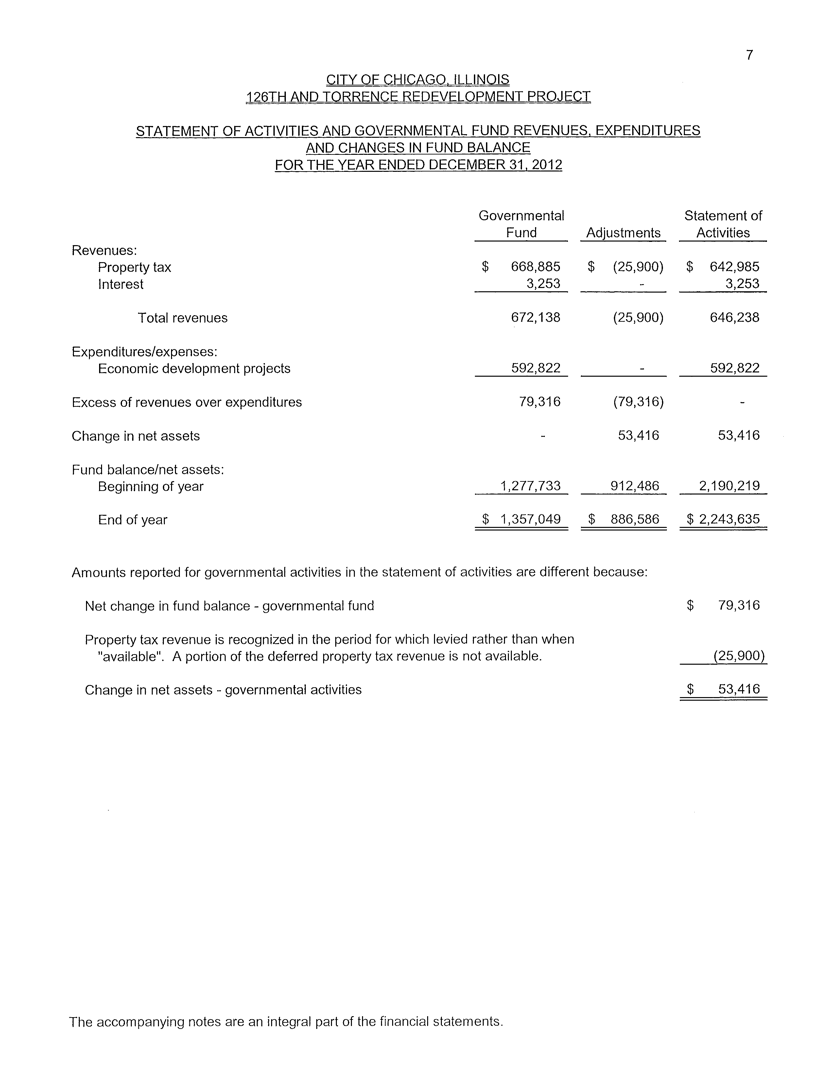

In [50]:
im_resized = page_31_image.resize([834, 1080])
display(im_resized)

In [52]:
# Draw rectangles onto the image
# ['year', 'tif_number', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text']
rect_image = ImageDraw.Draw(page_31_image)
for _, text in page_31_text.iterrows():
	rect = (text['left'] - 5, text['top'] - 5, text['left'] + text['width'] + 5, text['top'] + text['height'] + 5)
	rect_image.rectangle(rect, outline='red', width=4)

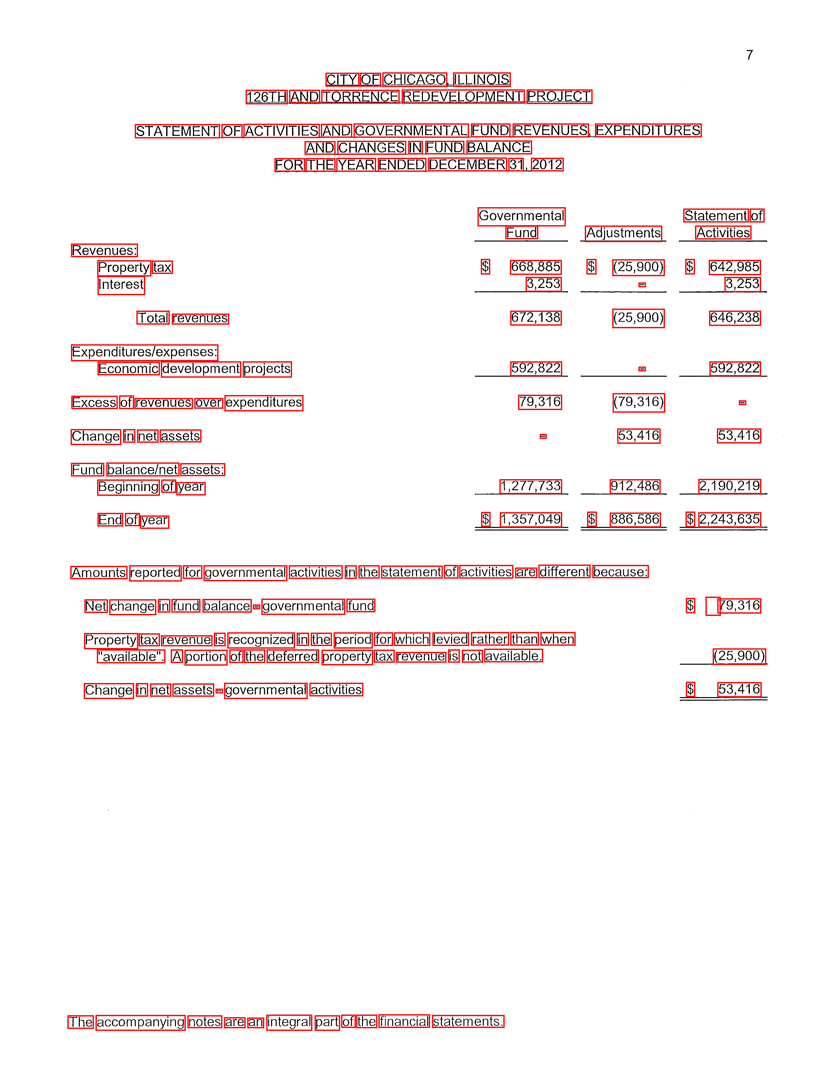

In [58]:
im_resized = page_31_image.resize([834, 1080])
display(im_resized)

In [ ]:
# Load in csv sheet
sheet_path = 'sheeeetman.pdf'
sheet = fitz.open(sheet_path)
sheet_page_31 = sheet.load_page(0)
sheet_pixmap = sheet_page_31.get_pixmap(dpi=300)
sheet_image = Image.frombytes('RGB', [sheet_pixmap.width, sheet_pixmap.height], sheet_pixmap.samples)
sheet_image_bytes = io.BytesIO()
sheet_image.save(sheet_image_bytes, jpg_quality=100, format="PNG")
sheet_image_bytes.seek(0)

sheet_picture = Image.open(sheet_image_bytes)
display(sheet_picture)